In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import generate_mu_z
from astroML.cosmology import Cosmology
from astroML.plotting.mcmc import convert_to_stdev
from astroML.decorators import pickle_results

% matplotlib inline

In [2]:
#------------------------------------------------------------
# Generate the data
z_sample, mu_sample, dmu = generate_mu_z(100, z0=0.3,
                                         dmu_0=0.05, dmu_1=0.004,
                                         random_state=1)


#------------------------------------------------------------
# define a log likelihood in terms of the parameters
#  beta = [omegaM, omegaL]
def compute_logL(beta):
    cosmo = Cosmology(omegaM=beta[0], omegaL=beta[1])
    mu_pred = np.array(map(cosmo.mu, z_sample))
    return - np.sum(0.5 * ((mu_sample - mu_pred) / dmu) ** 2)


#------------------------------------------------------------
# Define a function to compute (and save to file) the log-likelihood
@pickle_results('mu_z_nonlinear.pkl')
def compute_mu_z_nonlinear(Nbins=50):
    omegaM = np.linspace(0.05, 0.75, Nbins)
    omegaL = np.linspace(0.4, 1.1, Nbins)

    logL = np.empty((Nbins, Nbins))

    for i in range(len(omegaM)):
        #print '%i / %i' % (i + 1, len(omegaM))
        for j in range(len(omegaL)):
            logL[i, j] = compute_logL([omegaM[i], omegaL[j]])

    return omegaM, omegaL, logL

omegaM, omegaL, res = compute_mu_z_nonlinear()
res -= np.max(res)

@pickle_results: using precomputed results from 'mu_z_nonlinear.pkl'


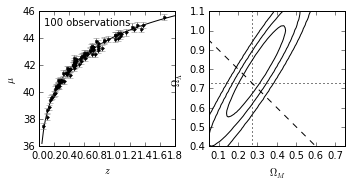

In [3]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.15, top=0.9)

# left plot: the data and best-fit
ax = fig.add_subplot(121)
whr = np.where(res == np.max(res))
omegaM_best = omegaM[whr[0][0]]
omegaL_best = omegaL[whr[1][0]]
cosmo = Cosmology(omegaM=omegaM_best, omegaL=omegaL_best)

z_fit = np.linspace(0.04, 2, 100)
mu_fit = np.asarray(map(cosmo.mu, z_fit))

ax.plot(z_fit, mu_fit, '-k')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray')

ax.set_xlim(0, 1.8)
ax.set_ylim(36, 46)

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.text(0.04, 0.96, "%i observations" % len(z_sample),
        ha='left', va='top', transform=ax.transAxes)

# right plot: the likelihood
ax = fig.add_subplot(122)

ax.contour(omegaM, omegaL, convert_to_stdev(res.T),
           levels=(0.683, 0.955, 0.997),
           colors='k')

ax.plot([0, 1], [1, 0], '--k')
ax.plot([0, 1], [0.73, 0.73], ':k')
ax.plot([0.27, 0.27], [0, 2], ':k')

ax.set_xlim(0.05, 0.75)
ax.set_ylim(0.4, 1.1)

ax.set_xlabel(r'$\Omega_M$')
ax.set_ylabel(r'$\Omega_\Lambda$')

plt.show()

/Users/joachim/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/joachim/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


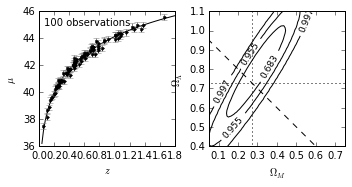

In [4]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.15, top=0.9)

# left plot: the data and best-fit
ax = fig.add_subplot(121)
whr = np.where(res == np.max(res))
omegaM_best = omegaM[whr[0][0]]
omegaL_best = omegaL[whr[1][0]]
cosmo = Cosmology(omegaM=omegaM_best, omegaL=omegaL_best)

z_fit = np.linspace(0.04, 2, 100)
mu_fit = np.asarray(map(cosmo.mu, z_fit))

ax.plot(z_fit, mu_fit, '-k')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray')

ax.set_xlim(0, 1.8)
ax.set_ylim(36, 46)

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.text(0.04, 0.96, "%i observations" % len(z_sample),
        ha='left', va='top', transform=ax.transAxes)

# right plot: the likelihood
ax = fig.add_subplot(122)

con = ax.contour(omegaM, omegaL, convert_to_stdev(res.T),
           levels=(0.683, 0.955, 0.997),
           colors='k')

ax.clabel(con, fontsize=9, inline=1)

ax.plot([0, 1], [1, 0], '--k')
ax.plot([0, 1], [0.73, 0.73], ':k')
ax.plot([0.27, 0.27], [0, 2], ':k')

ax.set_xlim(0.05, 0.75)
ax.set_ylim(0.4, 1.1)

ax.set_xlabel(r'$\Omega_M$')
ax.set_ylabel(r'$\Omega_\Lambda$')

plt.show()